
                
# Air Quality Analysis  
                
## Introduction   

 The Air Quality Analysis is a test performed on a particular parameter through which the Qualit(Whether good,moderate,unhealthy,Very Unhealthy,Hazardous). All of this data comes from EPA’s Air Quality System (AQS). Data collection agencies report their data to EPA via this system and it calculates several types of aggregate (summary) data for EPA internal use. This includes daily and annual summaries, but not monthly summaries, as these are not routinely needed by EPA.
#####    The raw data of Air Quality Analysis is given below:
#####       ref: " https://raw.githubusercontent.com/colaberry/data/master/8hour_42101_2017_10K.csv "
   The goal of this project is to explore the air quality of the Given area.Air quality data are  collected at outdoor monitors across the United States and can be download from EPA (Environment ProtectionAgency) web site 
   ##### http://www3.epa.gov/airdata/ad_data.html.
###  Air Quality Index
 The AQI is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The higher the AQI value, the greater the level of air pollution and the greater the health concern. Smaller AQI means better air quality.
## Exercise 1:
 Ingest all the data into a format that is easy for analysis using the raw data link.Assign it to a variable "Air_quality_data" and print distplot(). 

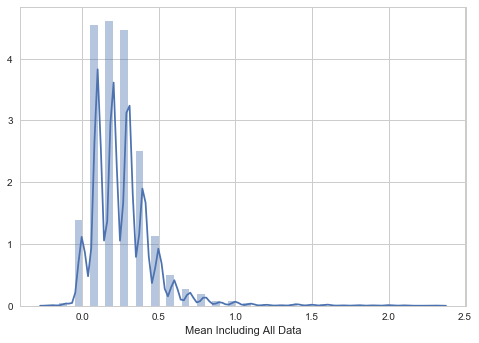

In [76]:
#code the graph 
#importing of libraries 
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
sns.set()
sns.set_style("whitegrid")
Air_quality_data=pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/8hour_42101_2017_10K.csv")
Air_quality_data.head(-1)

#start coding from here. 
#p=
p=sns.distplot(Air_quality_data['Mean Including All Data'])

#hint
use .distplot() function

In [ ]:
#answer
p=sns.distplot(Air_quality_data['Mean Including All Data'])

continue


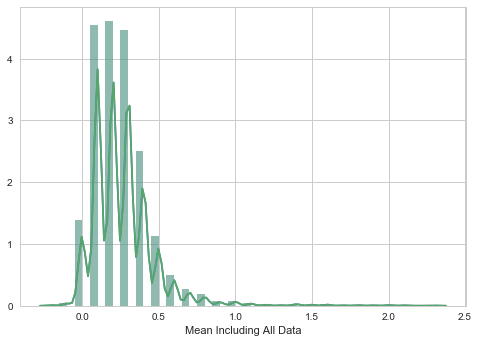

In [65]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        p=sns.distplot(Air_quality_data['Mean Including All Data'])
        if p==sns.distplot(Air_quality_data['Mean Including All Data']):
            return True
        else:
            return False

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')
        



# Exploratory Data Analysis(EDA)   
                
##  Visualization of Air Quality Data

  In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
###  Techniques:
There are a number of tools that are useful for EDA, but EDA is characterized more by the attitude taken than by particular techniques.

 Typical graphical techniques used in EDA are:

* Box plot
* Histogram
* Multi-vari chart
* Run chart
* Pareto chart
* Scatter plot 

### Exercise :

 

 Based on "Observation Count", find the Highest "Date Of Last Change" measuring "Mean Including All Data" using factor plot.

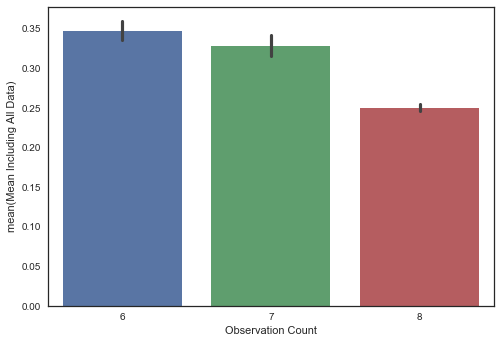

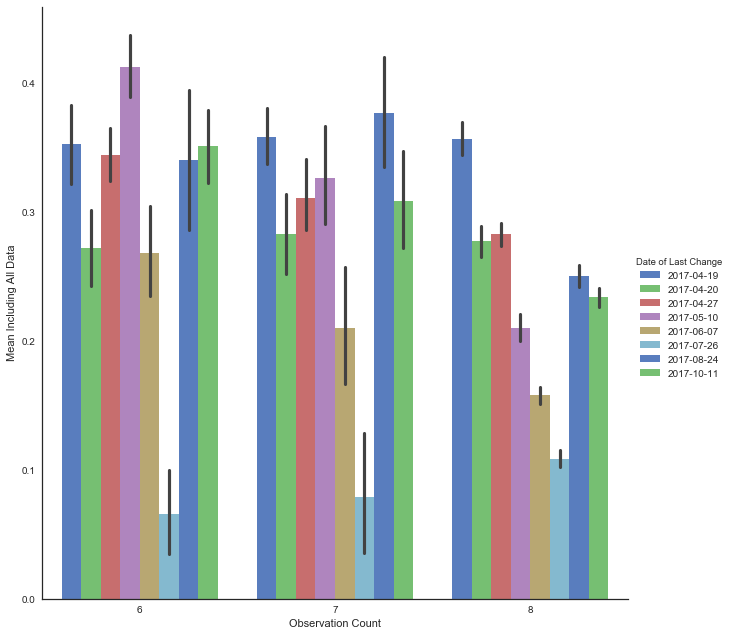

In [78]:
#analysing entire data using jointplot
sns.set()
sns.set_style("whitegrid")


#analysing data using bar plot
sns.set(style="white", color_codes=True)
sns.barplot(y="Mean Including All Data", x="Observation Count", data=Air_quality_data)
#plot a factor bar plot with respect to"Day Of Last Change"
p=sns.factorplot(y="Mean Including All Data", x="Observation Count",hue="Date of Last Change",data=Air_quality_data.head(-1),
                             size=9, kind="bar", palette="muted")

use factorplot() funtion from seaborn.

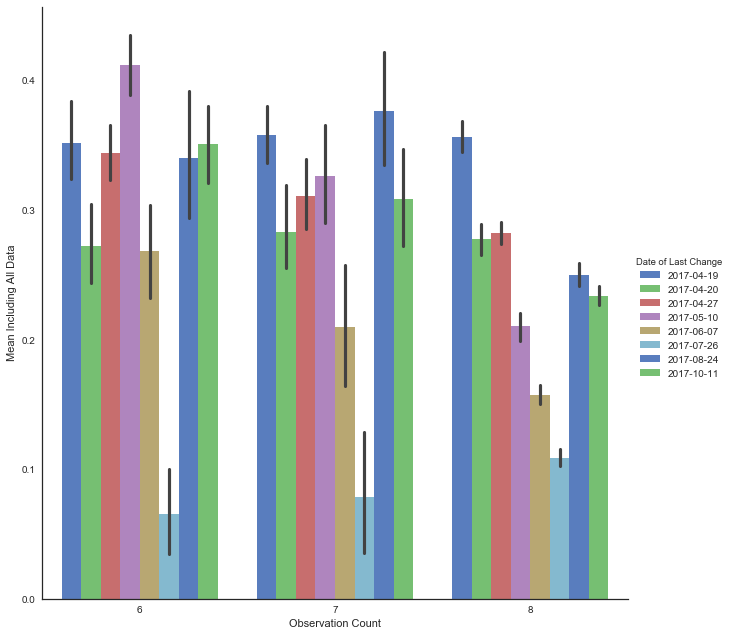

In [69]:
p=sns.factorplot(y="Mean Including All Data", x="Observation Count",hue="Date of Last Change",data=Air_quality_data.head(-1),
                             size=9, kind="bar", palette="muted")

continue


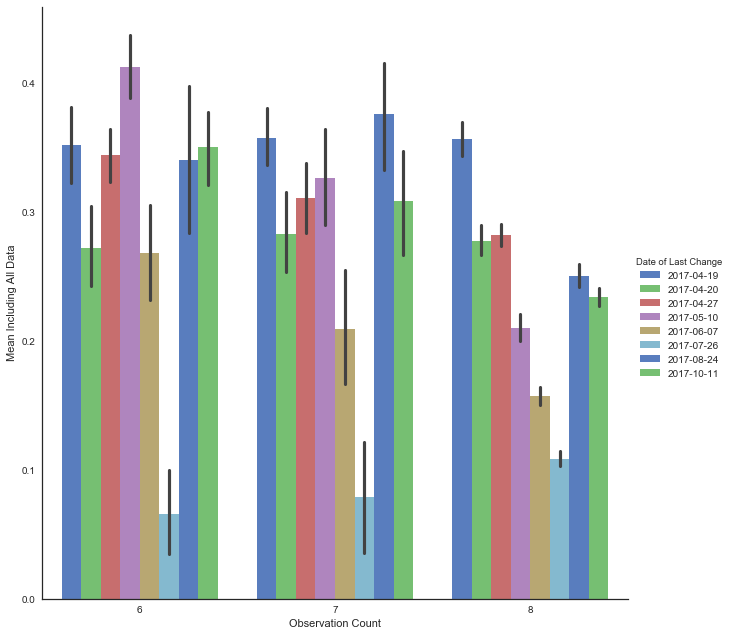

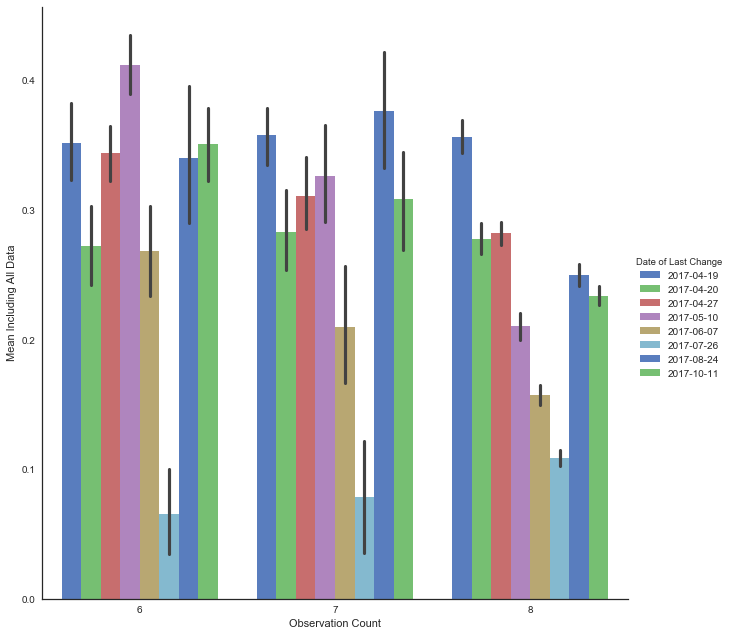

In [73]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        p =sns.factorplot(y="Mean Including All Data", x="Observation Count",hue="Date of Last Change",data=Air_quality_data.head(-1),size=9,kind="bar", palette="muted")
        if p==sns.factorplot(y="Mean Including All Data", x="Observation Count",hue="Date of Last Change",data=Air_quality_data.head(-1),size=9,kind="bar", palette="muted") :
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('The answer did not pass the test.')
    else:
        print('continue')
        



##   Clustering of data using k-means algorithm 

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space.
#### Cluster analysis using k-means:
In cluster analysis, the k-means algorithm can be used to partition the input data set into k partitions (clusters).
However, the pure k-means algorithm is not very flexible, and as such is of limited use (except for when vector quantization as above is actually the desired use case). In particular, the parameter k is known to be hard to choose (as discussed above) when not given by external constraints. Another limitation of the algorithm is that it cannot be used with arbitrary distance functions or on non-numerical data. For these use cases, many other algorithms have been developed since.
                
### Exercise :
clustering on the dataset to group data based on air quality.



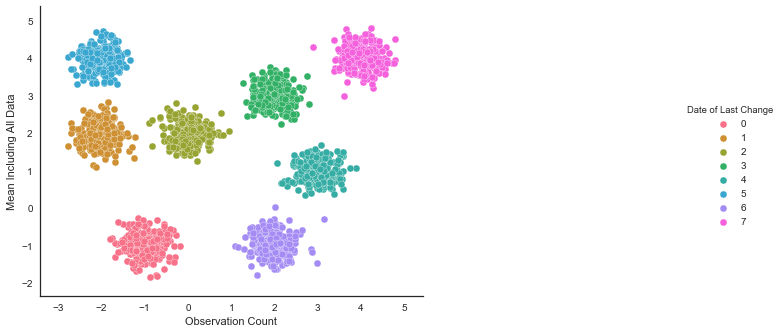

In [88]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import mixture 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

import numpy as np
import seaborn as sns
import pandas as pd



plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)


#Create clusters using make_blob feature
centers = [[-1, -1],[-2,2],[0,2],[2,3],[3,1],[-2,4],[2,-1],[4,4]]
X,y = make_blobs(n_samples=2000, centers=centers, cluster_std=0.3,
                            random_state=0)

# Transform the data into a dataframe
Air_quality_data = pd.DataFrame({'Observation Count':X[:,0], 'Mean Including All Data':X[:,1], 'Date of Last Change':y})

g = sns.pairplot(x_vars='Observation Count', y_vars='Mean Including All Data', hue= 'Date of Last Change', data=Air_quality_data)
g.fig.set_size_inches(14, 6)



use make-blobs and kMeans funtions

In [ ]:
#answer, write code which is a solution for above question.
raw_data = pd.DataFrame({'Observation Count':X[:,0], 'Mean Including All Data':X[:,1], 'Date of Last Change':y})

g = sns.pairplot(x_vars='Observation Count', y_vars='Mean Including All Data', hue= 'Date of Last Change', data=Air_quality_data)
g.fig.set_size_inches(14, 6)


continue


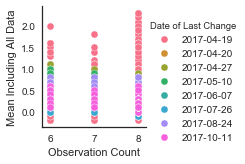

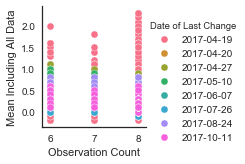

In [74]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        g = sns.pairplot(x_vars='Observation Count', y_vars='Mean Including All Data', hue= 'Date of Last Change', data=Air_quality_data)
        if g == sns.pairplot(x_vars='Observation Count', y_vars='Mean Including All Data', hue= 'Date of Last Change', data=Air_quality_data):
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('The answer did not pass the test.')
    else:
        print('continue')
        


### Exercise:
Observing k-means clustering using jointplot(). 


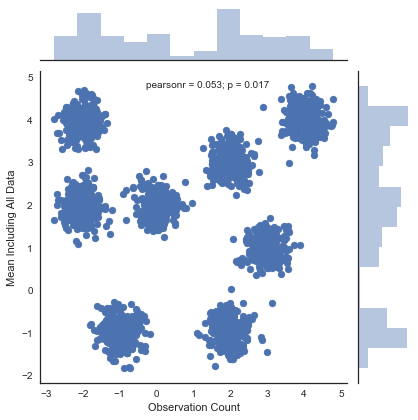


The answer did not pass the test.


In [89]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_
#y=pd.DataFrame(labels)

Air_quality_data['Date of Last Change '] = labels
   

q=sns.jointplot(x="Observation Count", y="Mean Including All Data", data=Air_quality_data,kind='scatter')
print(q)

continue


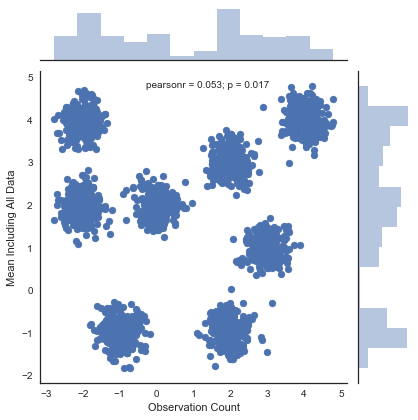

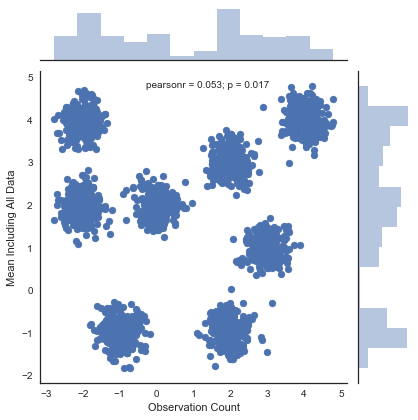

In [90]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        q=sns.jointplot(x="Observation Count", y="Mean Including All Data", data=Air_quality_data,kind='scatter')
        if q==sns.jointplot(x="Observation Count", y="Mean Including All Data", data=Air_quality_data,kind='scatter'):
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('The answer did not pass the test.')
    else:
        print('continue')